In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
df =pd.read_csv("alldata_tclean_pol_sub.csv")
df

C:\Users\mrizwan\AppData\Local\Temp\ipykernel_7104\923739191.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,text_cleaned,polarity,subjectivity
0,Happy New Year all hope you have a great year and know you're not alone,0.578788,0.734848
1,"Speak life into your kids, so they will have what it takes to tackle their own life one day. <3",0.800000,1.000000
2,FIVE hours remain! 5) Watch out for signs of and don't delay getting professional help when you need it.,0.100000,0.100000
3,Living with Depression? Read This ~~> and reTweet please,0.000000,0.000000
4,Ready to get rid of distractions and have an easier time focusing? You can through the Emerging Sensitive Program at Sensitive Evolution! Check out the details here:,0.231250,0.725000
...,...,...,...
210614,Have you heard Depression (Produced by D-MIC PRODUCTIONS) by Bongo on SoundCloud? ://,0.000000,0.000000
210615,Our dog Loki but 24/7,0.500000,0.600000
210616,"Article in press in "" as a predictor of long-term outcomes among individuals with moderate-to-severe traumatic "" ://",0.000000,0.000000
210617,"I'll for you, you pray for me. Matthew 18:19-20 reads it's better with two or three. Pray our loved ones say YES to and they will bend their knee. Pray they get honest & realize truth sets them free!",0.600000,0.733333


In [3]:
df = df[df["subjectivity"]> 0.5]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73368 entries, 0 to 210617
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   text_cleaned  73355 non-null  object 
 1   polarity      73368 non-null  float64
 2   subjectivity  73368 non-null  float64
dtypes: float64(2), object(1)
memory usage: 2.2+ MB


In [4]:
df.sample(10)

,text_cleaned,polarity,subjectivity
203022,"Just a reminder, depression is a terrible illness and someone you care about is secretly suffering from it",-0.700000,0.850000
153777,"All in all; being alive is still better than dying. You MUST love yourself enough to be alive: while you are at it, live a fulfilling and purposeful lifeGod bless you...",0.248052,0.514286
9713,What are you of ? is a and it causes .. is telling you to and take over!! Pick up your,-0.937500,0.900000
97829,"Hang in there! The world is messed up, that is why it needs YOU! Get well and help others. It is not an easy road but it gives life meaning! I,ve lived it. 4 decades of . Now making a difference. Grab on to something to give you hope!",0.677083,0.833333
89119,"Women that work more than 55 hours/week more likely to be depressed than those working 35-40 hours/week, according to a new study. However, men who work equivalent hours no more likely to show signs of . More at :",0.198052,0.636364
206518,"Epidemiological studies show an especially high comorbidity between and . 3% of comorbid addicts in rehab receive treatment only - because most rehabs arent equipped to diagnose or prescribe, dispense, and monitor",0.273333,0.833333
55822,"veru deepu nah jks im just depressed, here ya go",0.000000,1.000000
74488,The number of sick days taken by UK workers is at an all-time low but thats no cause for celebration.,-0.357143,0.578571
25556,"In this episode of The Naked Truth Movement with , I share my journey of overcoming + to become the successful coach that I am today. Tune in here:",0.375000,0.675000
9927,Excellent article on an important study: decreased high glycemic reduces : ||,0.290000,0.810000


In [5]:
def labelingData(row):
    if row["polarity"] < -0.1:
        return 0
    elif row["polarity"] >= -0.1 and row["polarity"] <= 0.3:
        return 1
    elif row["polarity"] > 0.3:
        return 2
    
df['label'] = df.apply(lambda row: labelingData(row), axis=1)
df.label.value_counts()

2    29931
1    28106
0    15331
Name: label, dtype: int64

In [9]:
df.sample(10)

,text_cleaned,polarity,subjectivity,label
145697,High Temperature Glass and Silicone Hookah Bowl,0.160000,0.540000,1
74247,Skype Counseling for Overcoming Anxiety and Depression. Inquiries welcome! See:,1.000000,0.900000,2
12815,"The devil whispered in my ear ""youre not strong enough to face this storm"" Today I whispered in the Devils ear I am the storm.",-0.108333,0.616667,0
134965,Hope your Monday goes well. You are,0.400000,1.000000,2
171258,I become my own hero as becoming reliant on others is only setting urself to fall again. If you won't help urself then don't expect anyone to do it for you,0.350000,0.950000,2
210475,"Sometimes you just got tired of feeling the pain, and realized one day you don't feel a damn.",-0.400000,0.700000,0
73614,You Have Depression or Are you Depressed? - LIVE WELL MAGIC,0.318182,0.750000,2
187176,Someone struggling with shares 8 ways of supporting a loved one who is suffering from this . Find out more:,0.483333,0.516667,2
146273,"Heads UP - Episode 15: Migraine and Depression interviews the Migraine Diva and blogger extraordinaire, Jaime Sanders, about winning in life despite having and .",0.500000,0.750000,2
66092,Huge rise in paramedics off sick with stress. And more sad news from the front-line ://www.bbc.co.uk/news/uk-scotland-47448363,-0.078571,0.814286,1


In [26]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73355 entries, 0 to 210617
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text_cleaned  73355 non-null  object
 1   label         73355 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ MB


In [27]:
df["text_cleaned"] = df["text_cleaned"].apply(lambda x: x.lower())
df = df[["text_cleaned", "label"]]

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
df =pd.read_csv("Reg_final_annotation_dep.csv")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df["text_cleaned"], df["label"], random_state=2018, test_size=0.2, stratify=df['label'])


C:\Users\mrizwan\AppData\Local\Temp\ipykernel_12020\2943140048.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [2]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
labels = ["Severe", "Moderate", "Mild"]

In [3]:
vec = CountVectorizer(stop_words='english')
X_train_count = vec.fit_transform(X_train)
X_test_count = vec.transform(X_test)

In [4]:
vec = TfidfVectorizer(stop_words='english')
X_train_tfidf = vec.fit_transform(X_train)
X_test_tfidf = vec.transform(X_test)

0.7205371140344898
[[1962  921  182]
 [ 588 4282  751]
 [ 141 1517 4327]]
                              s     m    mi  micro-average
accuracy                   0.88  0.74  0.82  0.81         
f1                         0.68  0.69  0.77  0.72         
false_discovery_rate       0.27  0.36  0.18  0.28         
false_negative_rate        0.36  0.24  0.28  0.28         
false_positive_rate        0.06  0.27  0.11  0.14         
negative_predictive_value  0.91  0.83  0.82  0.86         
positive_predictive_value  0.73  0.64  0.82  0.72         
precision                  0.73  0.64  0.82  0.72         
recall                     0.64  0.76  0.72  0.72         
sensitivity                0.64  0.76  0.72  0.72         
specificity                0.94  0.73  0.89  0.86         
true_negative_rate         0.94  0.73  0.89  0.86         
true_positive_rate         0.64  0.76  0.72  0.72         


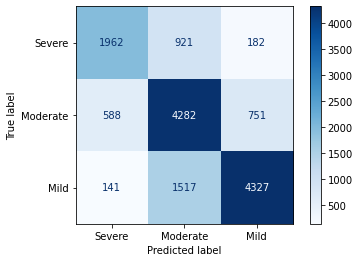

In [6]:
model = MultinomialNB()
model.fit(X_train_count, y_train)
print(model.score(X_test_count, y_test))

y_pred=model.predict(X_test_count)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix = cnf_matrix.astype(np.int32)
print(cnf_matrix)
import disarray

dfmetric = pd.DataFrame(cnf_matrix, index= ["s", "m", "mi"], columns=["s", "m", "mi"])
print(round(dfmetric.da.export_metrics(), 2))
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [25]:
#fpr = dfmetric.da.false_positive_rate.mean()


# roc curve here


[[1092 1731  242]
 [ 116 4640  865]
 [  15 1483 4487]]
                              s     m    mi  micro-average
accuracy                   0.86  0.71  0.82  0.80         
f1                         0.51  0.69  0.78  0.70         
false_discovery_rate       0.11  0.41  0.20  0.30         
false_negative_rate        0.64  0.17  0.25  0.30         
false_positive_rate        0.01  0.36  0.13  0.15         
negative_predictive_value  0.85  0.86  0.83  0.85         
positive_predictive_value  0.89  0.59  0.80  0.70         
precision                  0.89  0.59  0.80  0.70         
recall                     0.36  0.83  0.75  0.70         
sensitivity                0.36  0.83  0.75  0.70         
specificity                0.99  0.64  0.87  0.85         
true_negative_rate         0.99  0.64  0.87  0.85         
true_positive_rate         0.36  0.83  0.75  0.70         


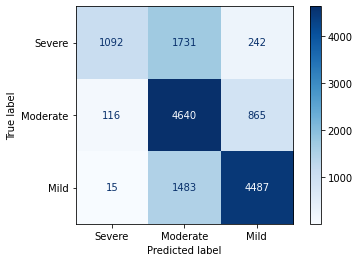

In [72]:

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)
model.score(X_test_tfidf, y_test)

y_pred=model.predict(X_test_tfidf)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix = cnf_matrix.astype(np.int32)
print(cnf_matrix)
import disarray

dfmetric = pd.DataFrame(cnf_matrix, index= ["s", "m", "mi"], columns=["s", "m", "mi"])
print(round(dfmetric.da.export_metrics(), 2))
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

C:\Users\mrizwan\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8007634108104423
[[2318  537  210]
 [ 513 4206  902]
 [ 105  656 5224]]
                              s     m    mi  micro-average
accuracy                   0.91  0.82  0.87  0.87         
f1                         0.77  0.76  0.85  0.80         
false_discovery_rate       0.21  0.22  0.18  0.20         
false_negative_rate        0.24  0.25  0.13  0.20         
false_positive_rate        0.05  0.13  0.13  0.10         
negative_predictive_value  0.94  0.85  0.91  0.90         
positive_predictive_value  0.79  0.78  0.82  0.80         
precision                  0.79  0.78  0.82  0.80         
recall                     0.76  0.75  0.87  0.80         
sensitivity                0.76  0.75  0.87  0.80         
specificity                0.95  0.87  0.87  0.90         
true_negative_rate         0.95  0.87  0.87  0.90         
true_positive_rate         0.76  0.75  0.87  0.80         


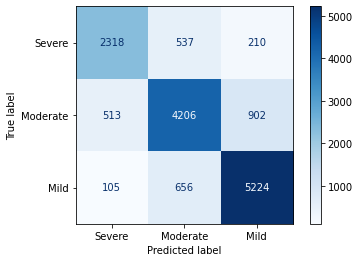

In [73]:

model = LogisticRegression()
model.fit(X_train_count, y_train)
print(model.score(X_test_count, y_test))

y_pred=model.predict(X_test_count)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix = cnf_matrix.astype(np.int32)
print(cnf_matrix)
import disarray

dfmetric = pd.DataFrame(cnf_matrix, index= ["s", "m", "mi"], columns=["s", "m", "mi"])
print(round(dfmetric.da.export_metrics(), 2))
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

C:\Users\mrizwan\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[2177  702  186]
 [ 442 4284  895]
 [  73  765 5147]]
                              s     m    mi  micro-average
accuracy                   0.90  0.81  0.87  0.86         
f1                         0.76  0.75  0.84  0.79         
false_discovery_rate       0.19  0.26  0.17  0.21         
false_negative_rate        0.29  0.24  0.14  0.21         
false_positive_rate        0.04  0.16  0.12  0.10         
negative_predictive_value  0.93  0.85  0.90  0.90         
positive_predictive_value  0.81  0.74  0.83  0.79         
precision                  0.81  0.74  0.83  0.79         
recall                     0.71  0.76  0.86  0.79         
sensitivity                0.71  0.76  0.86  0.79         
specificity                0.96  0.84  0.88  0.90         
true_negative_rate         0.96  0.84  0.88  0.90         
true_positive_rate         0.71  0.76  0.86  0.79         


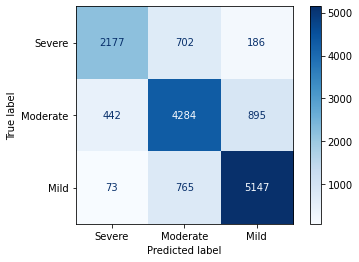

In [75]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)
model.score(X_test_tfidf, y_test)

y_pred=model.predict(X_test_tfidf)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix = cnf_matrix.astype(np.int32)
print(cnf_matrix)
import disarray

dfmetric = pd.DataFrame(cnf_matrix, index= ["s", "m", "mi"], columns=["s", "m", "mi"])
print(round(dfmetric.da.export_metrics(), 2))
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

0.7392134142185264
[[2186  658  221]
 [ 731 3765 1125]
 [ 201  890 4894]]
                              s     m    mi  micro-average
accuracy                   0.88  0.77  0.83  0.83         
f1                         0.71  0.69  0.80  0.74         
false_discovery_rate       0.30  0.29  0.22  0.26         
false_negative_rate        0.29  0.33  0.18  0.26         
false_positive_rate        0.08  0.17  0.15  0.13         
negative_predictive_value  0.92  0.80  0.87  0.87         
positive_predictive_value  0.70  0.71  0.78  0.74         
precision                  0.70  0.71  0.78  0.74         
recall                     0.71  0.67  0.82  0.74         
sensitivity                0.71  0.67  0.82  0.74         
specificity                0.92  0.83  0.85  0.87         
true_negative_rate         0.92  0.83  0.85  0.87         
true_positive_rate         0.71  0.67  0.82  0.74         


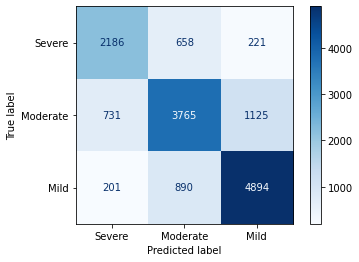

In [76]:

model = DecisionTreeClassifier()
model.fit(X_train_count, y_train)
print(model.score(X_test_count, y_test))

y_pred=model.predict(X_test_count)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix = cnf_matrix.astype(np.int32)
print(cnf_matrix)
import disarray

dfmetric = pd.DataFrame(cnf_matrix, index= ["s", "m", "mi"], columns=["s", "m", "mi"])
print(round(dfmetric.da.export_metrics(), 2))
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

[[2110  681  274]
 [ 694 3724 1203]
 [ 154  897 4934]]
                              s     m    mi  micro-average
accuracy                   0.88  0.76  0.83  0.82         
f1                         0.70  0.68  0.80  0.73         
false_discovery_rate       0.29  0.30  0.23  0.27         
false_negative_rate        0.31  0.34  0.18  0.27         
false_positive_rate        0.07  0.17  0.17  0.13         
negative_predictive_value  0.92  0.80  0.87  0.87         
positive_predictive_value  0.71  0.70  0.77  0.73         
precision                  0.71  0.70  0.77  0.73         
recall                     0.69  0.66  0.82  0.73         
sensitivity                0.69  0.66  0.82  0.73         
specificity                0.93  0.83  0.83  0.87         
true_negative_rate         0.93  0.83  0.83  0.87         
true_positive_rate         0.69  0.66  0.82  0.73         


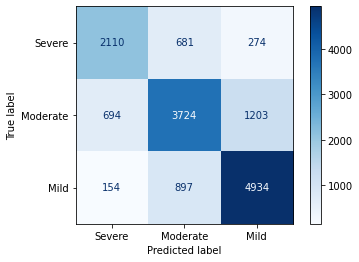

In [77]:

model = DecisionTreeClassifier()
model.fit(X_train_tfidf, y_train)
model.score(X_test_tfidf, y_test)

y_pred=model.predict(X_test_tfidf)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix = cnf_matrix.astype(np.int32)
print(cnf_matrix)
import disarray

dfmetric = pd.DataFrame(cnf_matrix, index= ["s", "m", "mi"], columns=["s", "m", "mi"])
print(round(dfmetric.da.export_metrics(), 2))
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [80]:
df.to_csv("Reg_final_annotation_dep.csv")